In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
job_num = 13561
base = './output/' + cfgbase + '_' + str(job_num)

props, threepts = analysis.readfile(base)    # C should be a dictionary whose keys are the momentum slices.

In [3]:
mom_list = analysis.get_mom_list()
propb = analysis.bootstrap(props)
threeptb = analysis.bootstrap(threepts)

In [4]:
props_inv = analysis.invert_prop(propb)

In [5]:
Γ = analysis.amputate(props_inv, threeptb)

In [6]:
Zq = analysis.quark_renorm(props_inv)

In [7]:
Γ_B, Γ_B_inv = analysis.born_term()

In [8]:
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)

In [9]:
μ, σ = analysis.get_statistics_Z(Z)

<IPython.core.display.Javascript object>


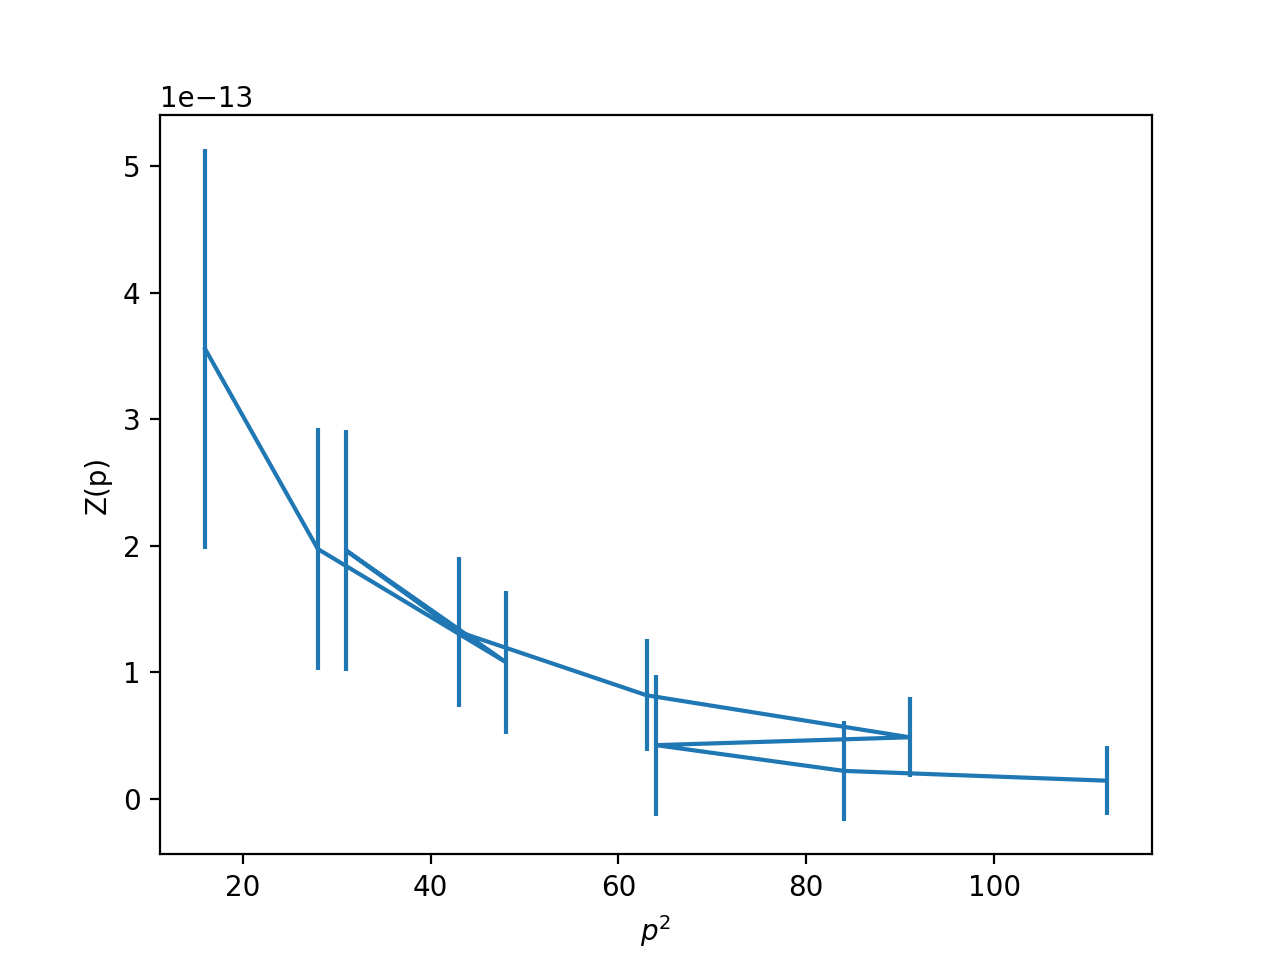

TypeError: imshow() missing 1 required positional argument: 'X'

In [19]:
p_squared = [analysis.norm(p) ** 2 for p in mom_list]
μ_list = [μ[analysis.plist_to_string(p)] for p in mom_list]
σ_list = [σ[analysis.plist_to_string(p)] for p in mom_list]
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list))
plt.ylabel('Z(p)')
plt.xlabel('$p^2$')
plt.imshow()